# **ESTRUTURA DO PROJETO**

**PASSO 1 - Importar as bibliotecas necessárias**

In [ ]:
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
import numpy as np

**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**

In [ ]:
#Conexão do google drive com o colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lista_planilhas = os.listdir('/content/drive/MyDrive/python dc/Projeto2/Arquivos')
display(lista_planilhas)

['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_vendas = pd.DataFrame()

for planilhas in lista_planilhas:
  if 'Vendas' in planilhas:
    tabela_vendas = pd.read_csv(f'/content/drive/MyDrive/python dc/Projeto2/Arquivos/{planilhas}')
    total_vendas = pd.concat([total_vendas, tabela_vendas])

display(total_vendas)

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,0,HL4379,Televisão,5,Gabriel,Thoni,6/30/2023,Curitiba,2500,NaN
1,7,HL2714,Tablet,2,Thays,Castro,3/7/2023,Curitiba,1600,NaN
2,22,HL1918,iPhone,3,Lucas,Rodrigues,10/8/2023,Curitiba,5300,NaN
3,28,HL1918,iPhone,3,Gabriel,Silva,8/21/2023,Curitiba,5300,NaN
4,59,HL4379,Televisão,3,Pedro,Conceiçío,5/16/2023,Curitiba,2500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_devolucoes = pd.DataFrame()

for planilhas in lista_planilhas:
  if 'Devolucoes' in planilhas:
    tabela_devolucoes = pd.read_csv(f'/content/drive/MyDrive/python dc/Projeto2/Arquivos/{planilhas}')
    total_devolucoes = pd.concat([total_devolucoes, tabela_devolucoes])

display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**

**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
quantidade_produto_vl = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending = False)
quantidade_lojas_vl = total_vendas[['Loja', 'Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending = False)

display(HTML('<h2>Quantidade de vendas líquidas por produto:</h2><br>'))
display(quantidade_produto_vl.head(3))

display(HTML('<br><br><h2>Quantidade de vendas líquidas por lojas:</h2><br>'))
display(quantidade_lojas_vl.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [ ]:
#gráfico de pizza

grafico1 = px.pie(quantidade_produto_vl.reset_index(), names='Produto', values='Quantidade', title='Quantidade de vendas líquidas por produto')
grafico1.update_traces(textposition = 'inside', textinfo='label+percent')
grafico1.show()

#gráfico de barra

grafico2 = px.bar(quantidade_lojas_vl, x=quantidade_lojas_vl.index, y='Quantidade', title='Quantidade de vendas líquidas por loja', color='Quantidade')
grafico2.show()

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['SKU','Produto'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending = False)
quantidade_lojas_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['Loja'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending = False)

display(HTML('<h2>Quantidade de vendas brutas dos três principais produtos:</h2><br>'))
display(quantidade_produto_vb.head(3))

display(HTML('<br><br><h2>Quantidade de vendas brutas das três principais lojas:</h2><br>'))
display(quantidade_lojas_vb.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [ ]:
#gráfico de barra

grafico3= px.bar(
    quantidade_produto_vb.reset_index(),
    x='Produto',
    y='Quantidade',
    title='Quantidade de vendas brutas dos produtos',
    color='Produto'
)

grafico3.update_xaxes(categoryorder='total ascending')
grafico3.update_layout(
    plot_bgcolor='rgba(230,206,230,90)',
    paper_bgcolor='white',
    font_color='black'
)

grafico3.show()


grafico4= px.bar(
    quantidade_lojas_vb.reset_index(),
    x='Loja',
    y='Quantidade',
    title='Quantidade de vendas brutas dos loja',
    color='Loja'
)
grafico4.update_layout(
    xaxis = {
        'tickfont': {
            'color': 'blue',
            'size': 14
        },
        'title':{
            'text': 'Eixo X',
            'font':{
                'color': 'orange',
                'size': 18
            }
        }
    },
    yaxis = {
        'tickfont': {
            'color': 'red',
            'size': 14
        },
        'title':{
            'text': 'Eixo Y',
            'font':{
                'color': 'violet',
                'size': 18
            }
        }
    }
)

grafico4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.

In [ ]:
quantidade_produto_devolucoes = total_devolucoes[['Produto','Quantidade']].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending = False)
quantidade_lojas_devolucoes = total_devolucoes[['Loja','Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending = False)

display(HTML('<h2>Quantidade de devoluções dos três principais produtos:</h2><br>'))
display(quantidade_produto_devolucoes.head(3))

display(HTML('<br><br><h2>Quantidade de devoluções das três principais lojas:</h2><br>'))
display(quantidade_lojas_devolucoes.head(3))

,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


Text(0.5, 1.0, 'Quantidade de devoluções por produto e por loja')

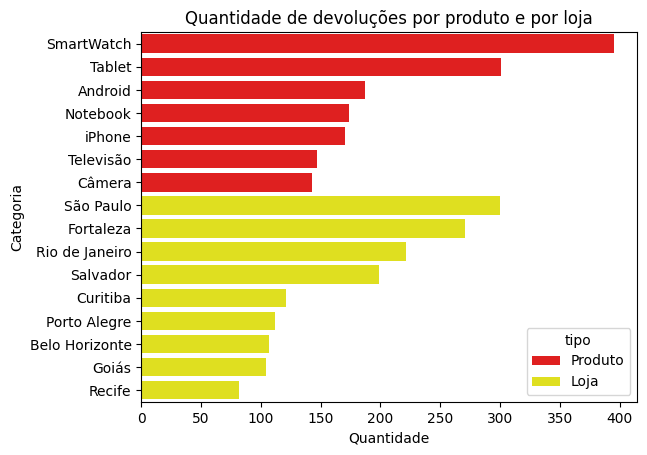

In [ ]:
quantidade_produto_devolucoes_grafico = pd.DataFrame({
    'Categoria': quantidade_produto_devolucoes.index,
    'Quantidade': quantidade_produto_devolucoes['Quantidade'],
    'tipo': ['Produto'] * len(quantidade_produto_devolucoes)
})

quantidade_lojas_devolucoes_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_lojas_devolucoes.index,
        'Quantidade': quantidade_lojas_devolucoes['Quantidade'],
        'tipo': ['Loja'] * len(quantidade_lojas_devolucoes)
    }
)

df_concat = pd.concat([quantidade_produto_devolucoes_grafico, quantidade_lojas_devolucoes_grafico])

grafico5 = sns.barplot(data=df_concat, x = 'Quantidade', y = 'Categoria', hue = 'tipo', orient = 'h', palette = {'Produto': 'red', 'Loja': 'yellow'})
grafico5.set_title('Quantidade de devoluções por produto e por loja')

**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.

In [ ]:
data_formatada = pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')
vendas_mensais = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade']
    }
)

vendas_mensais = vendas_mensais.set_index('Data').resample('M').sum()

vendas_mensais.index = vendas_mensais.index.strftime('%b/%Y')

vendas_mensais['Variacao'] = vendas_mensais['Quantidade'].diff()


display(HTML('<h2>Variação das vendas dos produtos por mês.</h2><br>'))
display(vendas_mensais)

,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [ ]:
# Gráfico de linhas
text_color = np.where(vendas_mensais['Variacao']<= 0, 'red', 'blue')
#classificacao = np.where(vendas_mensais['Variacao']<= 0, text_color = 'red', 'Alta')
display(text_color)
grafico6 = px.line(vendas_mensais, x= vendas_mensais.index, y = 'Quantidade', title = 'Vendas Mensais x Sazonalidade', markers = 'True', text = vendas_mensais['Quantidade'])
grafico6.update_traces(textposition = 'top center', textfont = dict(color=text_color, size = 15), marker= dict(color = text_color))
grafico6.show()

array(['blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue',
       'blue', 'blue', 'blue'], dtype='<U4')

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.

In [ ]:
faturamento_trimestral = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitário': total_vendas['Valor Unitário'],
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }
)

faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')

faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())


display(HTML('<h2>Faturamento trimestral.</h2><br>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [ ]:
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

marker_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')

grafico7 = px.area(faturamento_trimestral, x=faturamento_trimestral.index,
                   y='Faturamento', title = 'Faturamento Trimestral',
                   markers = True)

grafico7.update_layout(
    margin=dict(t=50, l=300, r=300, b=50),
    title=dict(x=0.5)
)

grafico7.update_traces(fillcolor='rgba(27,239,143,0.2)',
                       marker=dict(color=marker_color),
                       line_color='rgba(27,239,143,1)'
                       )

grafico7.show()